In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_folder_path = 'images/'
imgPaths = [img_folder_path + name for name in os.listdir(img_folder_path) if not name[0] == '.']

print(imgPaths[:5])

['images/00a454da495e11e28a7322000a1fa414_6.jpg', 'images/00cddb96ac4c11e3a30212279ba1b65f_6.jpg', 'images/01cdd7aa1a1a11e2aaa822000a1fb0dd_6.jpg', 'images/024696bead0c11e389d50ec42b3b1b1c_6.jpg', 'images/026df048221a11e2b52122000a1fa4b5_6.jpg']


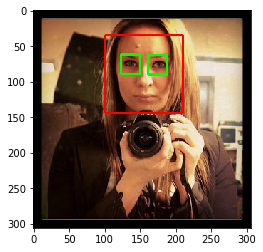

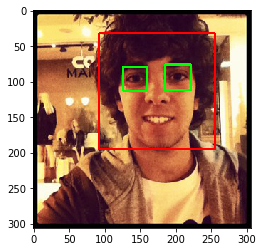

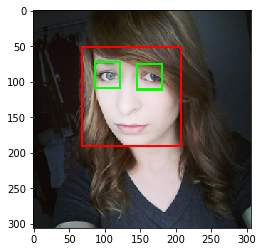

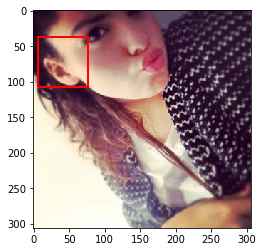

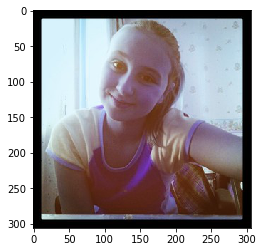

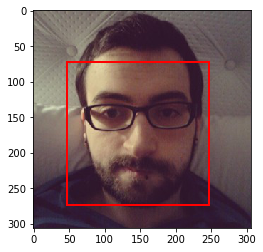

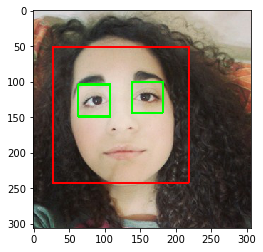

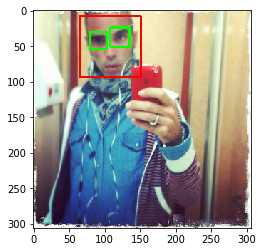

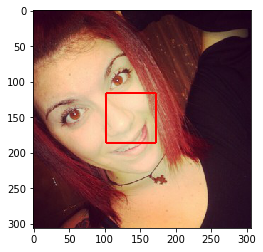

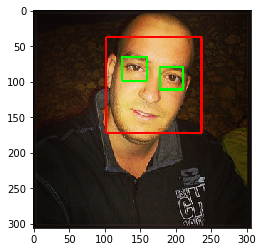

In [3]:
for img in imgPaths[20:30]:
    img = cv2.imread(img)
    
    face_cascade = cv2.CascadeClassifier("utils/haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier('utils/haarcascade_eye.xml')
    smile_cascade = cv2.CascadeClassifier('utils/haarcascade_smile.xml')
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    detected_faces = face_cascade.detectMultiScale(gray)
    
    for(x, y, w, h) in detected_faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # smile = smile_cascade.detectMultiScale(roi_gray)
        
        # faces.append(np.array(roi_color))
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
        # for (sx,sy,sw,sh) in smile:
        #    cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,255),2)

        plt.imshow(img)
        plt.show()
        
    if len(detected_faces) == 0:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()